<a href="https://colab.research.google.com/github/Mechanics-Mechatronics-and-Robotics/ML-2024/blob/main/Heteroscedastic_regression_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Generate synthetic data
n_samples = 100
X = np.linspace(-5, 5, n_samples).reshape(-1, 1)
true_mean = 2 * X + 3
true_variance = 0.1 * (X + 5)**2  # Variance increases with X
noise = np.random.normal(0, np.sqrt(true_variance))
y = true_mean + noise

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

In [3]:
class HeteroscedasticRegression(nn.Module):
    def __init__(self):
        super(HeteroscedasticRegression, self).__init__()
        self.mean_layer = nn.Linear(1, 1)
        self.log_var_layer = nn.Linear(1, 1)

    def forward(self, x):
        mean = self.mean_layer(x)
        log_var = self.log_var_layer(x)
        var = torch.exp(log_var)
        return mean, var

In [4]:
def heteroscedastic_loss(y_true, mean, var):
    loss = 0.5 * torch.log(var) + 0.5 * (y_true - mean)**2 / var
    return torch.mean(loss)

In [5]:
# Initialize the model, optimizer, and loss function
model = HeteroscedasticRegression()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    mean_pred, var_pred = model(X_tensor)
    loss = heteroscedastic_loss(y_tensor, mean_pred, var_pred)

    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 1.3450
Epoch [200/1000], Loss: 1.0280
Epoch [300/1000], Loss: 0.8975
Epoch [400/1000], Loss: 0.7983
Epoch [500/1000], Loss: 0.7291
Epoch [600/1000], Loss: 0.6915
Epoch [700/1000], Loss: 0.6762
Epoch [800/1000], Loss: 0.6712
Epoch [900/1000], Loss: 0.6699
Epoch [1000/1000], Loss: 0.6697


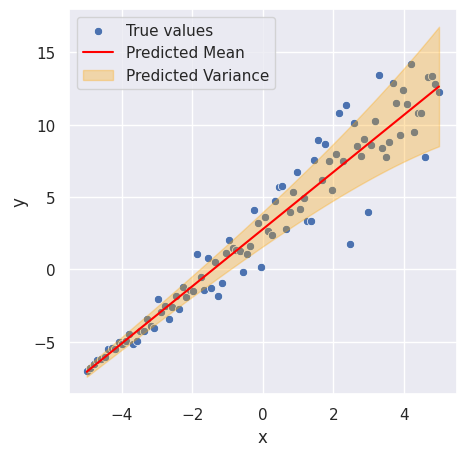

In [19]:
# Evaluate the model
model.eval()
with torch.no_grad():
    mean_pred, var_pred = model(X_tensor)

# Convert predictions to numpy arrays
mean_pred = mean_pred.numpy()
var_pred = var_pred.numpy()

# Set the Seaborn style to darkgrid with a blue background
sns.set(style="darkgrid", rc={"axes.facecolor": "blue", "grid.color": "white"})

# Plot the results
plt.figure(figsize=(5, 5))

# Plot the true data
sns.set_style("darkgrid")
sns.scatterplot(x=X.flatten(), y=y.flatten(), label='True values')

# Plot the predicted mean
sns.lineplot(x=X.flatten(), y=mean_pred.flatten(), color='red', label='Predicted Mean')

# Plot the predicted variance as confidence intervals
plt.fill_between(X.flatten(), mean_pred.flatten() - np.sqrt(var_pred.flatten()),
                 mean_pred.flatten() + np.sqrt(var_pred.flatten()),
                 color='orange', alpha=0.3, label='Predicted Variance')

plt.xlabel('x')
plt.ylabel('y')
#plt.title('Heteroscedastic Regression')
plt.legend()
plt.show()